The original dataset source: https://www.kaggle.com/datasets/tornikeonoprishvili/tbilisi-housing-challenge-2020?resource=download

The main goal of this project is to explore the dataset as much as possible: calculate some values, visualize etc.

According to the desctiption of the dataset on kaggle, the columns of the frame are:

    price: Price of house in GEL
    space: total area of house in m^2.
    room: # of rooms
    bedroom: # of bedrooms
    furniture: comes with furniture
    latitude & longitude: geo coordinates
    city_area: location of house
    floor: what floor is the house at
    max_floor: top floor in building
    apartment_type: can be 'new', 'old' or 'construction'. latter means apartment is not finished.
    renovation_type: can be 'white frame', 'black frame', etc. look it up.
    balcony: has balcony or not

In [1]:
#let's start by importing the necessary libraries


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import folium
import statsmodels.formula.api as smf

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#reading the frame
df = pd.read_csv('housing_clean_2.csv')

In [3]:
# get the information about columns, their names and types, number of rows, non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29204 entries, 0 to 29203
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       29204 non-null  int64  
 1   price            29204 non-null  int64  
 2   space            29204 non-null  float64
 3   room             29204 non-null  int64  
 4   bedroom          29204 non-null  int64  
 5   furniture        29204 non-null  int64  
 6   latitude         28958 non-null  float64
 7   longitude        28958 non-null  float64
 8   city_area        29204 non-null  object 
 9   floor            29204 non-null  int64  
 10  max_floor        29204 non-null  int64  
 11  apartment_type   29194 non-null  object 
 12  renovation_type  29204 non-null  object 
 13  balcony          29204 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.1+ MB


In [4]:
# check statistics of the features
df.describe()

# It seems like we don't have weird values (i.e. negative values for price, space, room number etc.)

,Unnamed: 0,price,space,room,bedroom,furniture,latitude,longitude,floor,max_floor,balcony
count,29204.000000,2.920400e+04,29204.000000,29204.000000,29204.000000,29204.000000,28958.000000,28958.000000,29204.000000,29204.000000,29204.000000
mean,19711.470894,2.988408e+05,87.569128,2.923298,1.819751,0.430592,41.729477,44.781414,6.361663,10.744556,0.776092
std,12077.748859,1.952151e+06,45.717693,1.050128,0.852494,0.495168,0.051541,0.083022,4.707854,5.454033,0.416868
min,0.000000,3.300000e+03,13.000000,1.000000,0.000000,0.000000,40.469229,38.829869,0.000000,0.000000,0.000000
25%,9367.750000,1.483000e+05,57.000000,2.000000,1.000000,0.000000,41.708101,44.753788,3.000000,7.000000,1.000000
50%,19179.000000,2.142000e+05,75.000000,3.000000,2.000000,0.000000,41.724521,44.772078,5.000000,10.000000,1.000000
75%,29826.250000,3.394000e+05,105.000000,3.000000,2.000000,1.000000,41.734181,44.810649,9.000000,14.000000,1.000000
max,41662.000000,3.295100e+08,530.000000,14.000000,4.000000,1.000000,44.266066,47.238277,127.000000,113.000000,1.000000


In [5]:
#let's find out how many missing values we have:

df.isnull().sum()

Unnamed: 0           0
price                0
space                0
room                 0
bedroom              0
furniture            0
latitude           246
longitude          246
city_area            0
floor                0
max_floor            0
apartment_type      10
renovation_type      0
balcony              0
dtype: int64

In [6]:
# the first column (Unnamed: 0) seems to be useless, so we can drop it
df = df.drop(['Unnamed: 0'], axis=1)
df.head(1)

,price,space,room,bedroom,furniture,latitude,longitude,city_area,floor,max_floor,apartment_type,renovation_type,balcony
0,107100,28.0,1,1,0,41.724521,44.753788,Saburtalo District,11,11,new,newly renovated,1


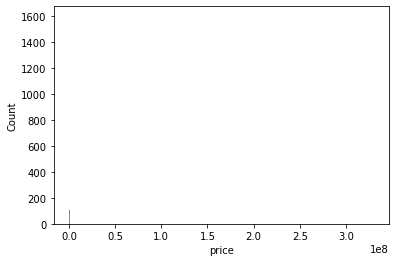

In [7]:
#let's see the distribution of the price variable

sns.histplot(data=df, x='price')
pass

It seems like we have an outlier which makes it hard to notice the distribution. We can filter the price column.

In [8]:
df.sort_values(by='price', ascending=False)

,price,space,room,bedroom,furniture,latitude,longitude,city_area,floor,max_floor,apartment_type,renovation_type,balcony
8738,329510000,80.0,2,1,0,41.693176,44.801543,Mtatsminda District,2,3,old,old renovation,1
10034,33065800,199.0,3,0,0,41.790307,44.759352,Saburtalo District,9,9,construction,white frame,0
16629,10376300,67.0,2,1,0,41.730124,44.775239,Saburtalo District,10,11,new,black frame,1
4624,9885300,473.0,12,0,0,41.710960,44.800562,Chugureti District,1,1,old,old renovation,1
286,6287100,53.0,3,2,1,41.794219,44.758905,Saburtalo District,10,11,new,newly renovated,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,8600,43.0,2,1,0,41.676111,44.848134,Isani District,5,12,new,white frame,1
4167,3660,60.0,3,2,0,41.785002,44.755337,Saburtalo District,9,10,new,newly renovated,1
594,3300,51.0,2,1,1,41.682883,44.823815,Krtsanisi District,4,8,new,newly renovated,1
27863,3300,50.0,3,1,1,41.751417,44.770875,Vake District,1,2,old,newly renovated,0


In [9]:
#the biggest value is 329510000. WOW. 
#let's drop values and plot the histogram once again

# we can calculate the quartiles and select the rows that are in the 3rd quartile

df.price.quantile([0.25,0.5,0.75])

0.25    148300.0
0.50    214200.0
0.75    339400.0
Name: price, dtype: float64

So, most flats are within 100k and 200k GEL


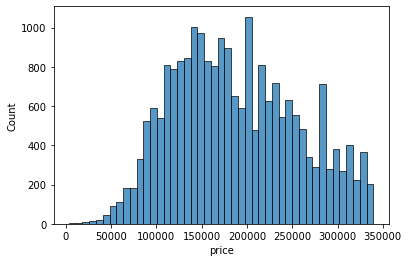

In [10]:
#filtering and plotting again

df_filtered = df[df['price']<=339400.0]

sns.histplot(data=df_filtered, x='price')
pass

print('So, most flats are within 100k and 200k GEL')

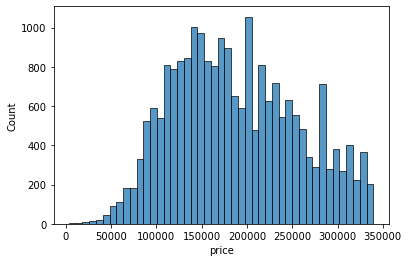

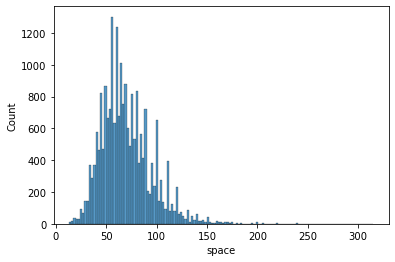

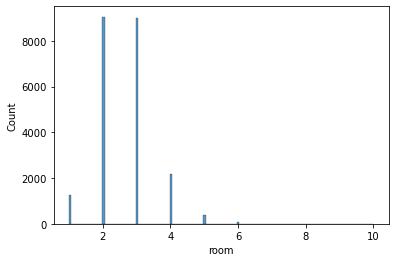

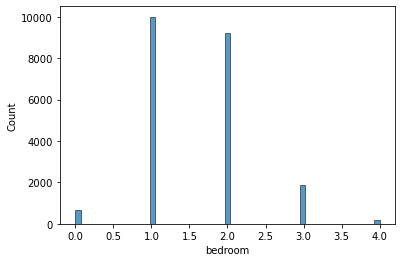

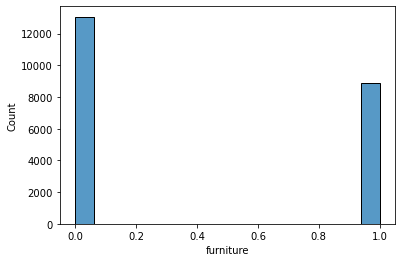

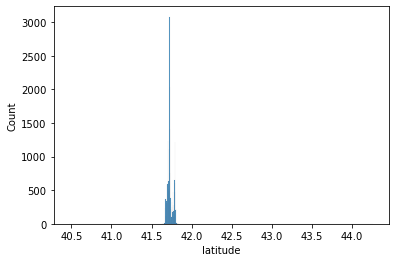

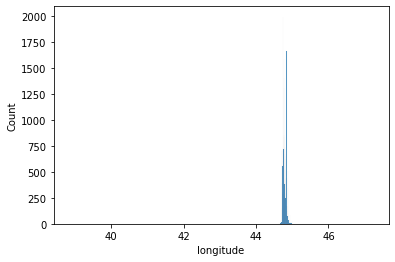

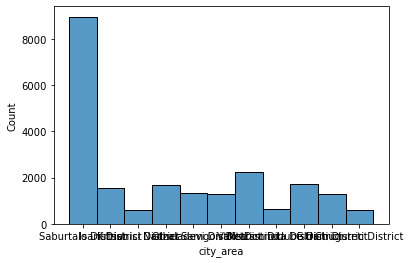

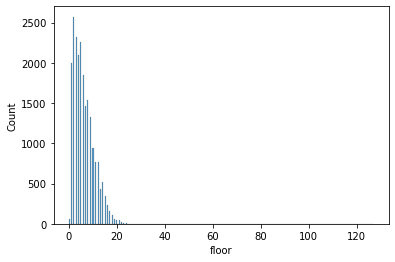

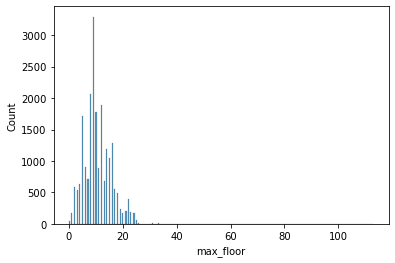

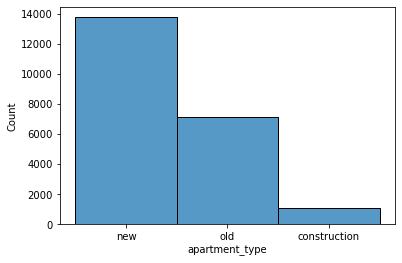

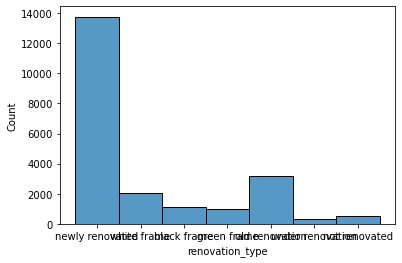

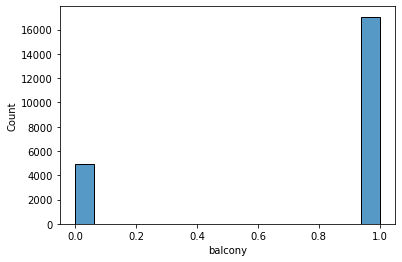

In [11]:
# let's make some scatter plots with price as x-axis and other variables as y-axis

for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df_filtered)

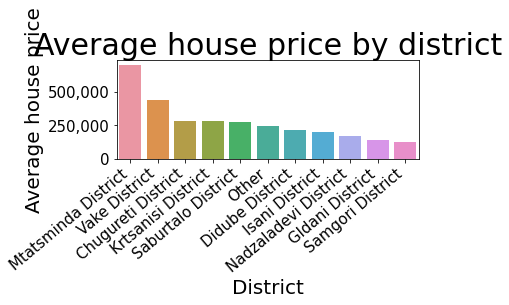

In [12]:
# I wonder what district has the biggest average price. Let's find out

districts = df.groupby('city_area').price.agg(
    price  = 'mean'
    ).sort_values(by='price', ascending=False).reset_index()

import matplotlib
ax = sns.barplot(data = districts, x='city_area',y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.axes.set_title("Average house price by district",fontsize=30)
ax.set_xlabel("District",fontsize=20)
ax.set_ylabel("Average house price",fontsize=20)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(labelsize=15)
plt.tight_layout()
plt.show()

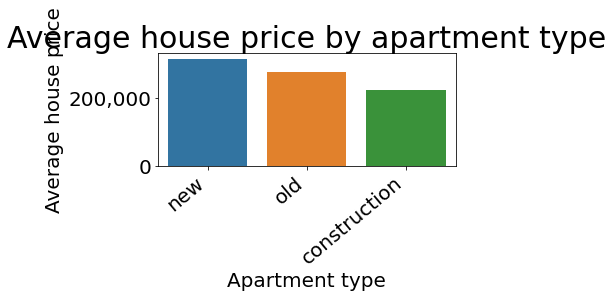

In [13]:
# we should also check how average house price depends on the apartment type 

apartment_type = df.groupby('apartment_type').price.agg(
    price  = 'mean'
    ).sort_values(by='price', ascending=False).reset_index()

import matplotlib
ax = sns.barplot(data = apartment_type, x='apartment_type',y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.axes.set_title("Average house price by apartment type",fontsize=30)
ax.set_xlabel("Apartment type",fontsize=20)
ax.set_ylabel("Average house price",fontsize=20)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

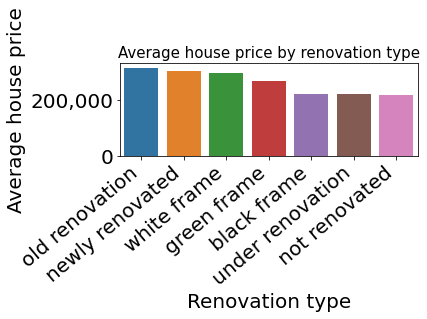

In [14]:
# and renovation type
renovation_type = df.groupby('renovation_type').price.agg(
    price  = 'mean'
    ).sort_values(by='price', ascending=False).reset_index()

import matplotlib
ax = sns.barplot(data = renovation_type, x='renovation_type',y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.axes.set_title("Average house price by renovation type",fontsize=15)
ax.set_xlabel("Renovation type",fontsize=20)
ax.set_ylabel("Average house price",fontsize=20)
ax.tick_params(labelsize=20)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

According to our data, Mtatsminda District has the biggest average house price. In fact, it seems like it's true: Mtatsminda is the historic old town, where real estate price is always high (see
https://tbilisi-property.com/a-guide-to-the-different-districts-of-tbilisi/ for more info)

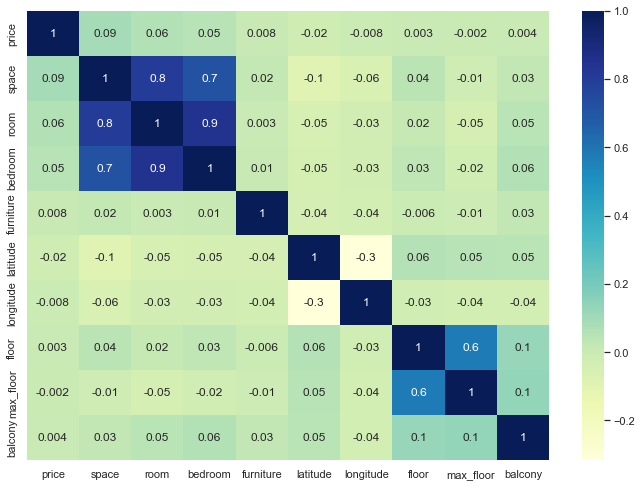

In [15]:
# Let's also make a correlation matrix heatmap

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.1g')
pass

It seems like correlation between house area and room number is great (which is obvious)

In [16]:
# as we have coordinates for the flats, we can make a map using geopandas

#first, we need to drop NA values
df_coordinates = df.dropna(subset=['latitude', 'longitude'])

#and let's plot only one thousand of rows, because it takes a lot of time to plot all points
df_coordinates = df_coordinates.head(1000)

#centroid for Tbilisi to set map location
map = folium.Map(location=[41.716667, 44.783333], zoom_start=10)

# define a function to add a marker for each row in the dataframe
def add_marker(row):
    folium.Marker(location=[row['latitude'], row['longitude']],
                 icon = folium.Icon(color='lightred',
                                    icon_color='lightred')).add_to(map)

# apply the function to each row of the dataframe
df_coordinates.apply(add_marker, axis=1)


# display the map
map

# Modelling: predict price by multiple variables

In [19]:
# Fit OLS regression model and inspect the results
model = smf.ols('price ~ space + furniture + floor + balcony', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     63.30
Date:                Tue, 09 May 2023   Prob (F-statistic):           2.28e-53
Time:                        16:36:09   Log-Likelihood:            -4.6432e+05
No. Observations:               29204   AIC:                         9.286e+05
Df Residuals:                   29199   BIC:                         9.287e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.028e+04   3.55e+04     -1.699      0.0




Coefficients interpretation:

 - The R-squared is very small (0.009) which says that only 0,09% of the price values can be explained by the predictors.

 - The P-value of furniture, floor and balcony is more than 0.05, which says that these variables show no significance in the model.

 - Overall, this model needs improving.